# Graph log_count
### Niklas Lantau

In [265]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import os
import re

In [266]:
# Read logs
all_files = {}

pdir = r'/home/nlantau/.config/scripts/log_data'

for file in os.listdir(pdir):
    time_stamps = []
    for t in open(pdir + '/' + file):
        time_stamps.append(t.strip())
    all_files[file.replace('2021-','').replace('-','.').rstrip('.log')] = time_stamps
#all_files.keys()

In [267]:
# Parse log data
x_vals = {5:[], 6:[], 7:[]}
y_vals = []

r1 = re.compile(r'(?P<one>\d+)\.(?P<two>\d+)')

for i in sorted(all_files):
    y_vals.append(len(all_files[i]))
    x_vals[int(r1.match(i).group("one"))].append(
        (int(r1.match(i).group("two")), len(all_files[i])))
#x_vals[5]

In [268]:
# Dictionary with predicted x-values
x_pred = {5:[], 6:[], 7:[]}

## May 2021

In [269]:
# Extract x- and y-values for may
x_5 = [x_vals[5][x][0] for x in range(len(x_vals[5]))]
y_5 = [x_vals[5][x][1] for x in range(len(x_vals[5]))]

# Reshape x- and y-values for Linear Regression
x_pred[5] = np.array(x_5).reshape((-1,1))
y_5 = np.array(y_5).reshape((-1,1))

# Predict model
model_5 = LinearRegression().fit(x_pred[5], y_5)
y_pred_5 = model_5.predict(x_pred[5])

## June 2021

In [270]:
# Extract x- and y-values for may
x_6 = [x_vals[6][x][0] for x in range(len(x_vals[6]))]
y_6 = [x_vals[6][x][1] for x in range(len(x_vals[6]))]

# Reshape x- and y-values for Linear Regression
x_pred[6] = np.array(x_6).reshape((-1,1))
y_6 = np.array(y_6).reshape((-1,1))

# Predict model
model_6 = LinearRegression().fit(x_pred[6], y_6)
y_pred_6 = model_6.predict(x_pred[6])

## Plot datapoints and regression

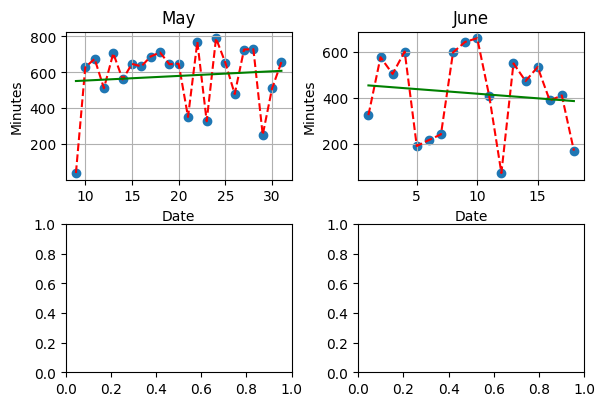

In [273]:
fig, ax = plt.subplots(2,2)
fig.dpi = 100
fig.tight_layout()

ax[0,0].scatter(x_5, y_5)
ax[0,0].plot(x_5, y_5, 'r--')
ax[0,0].plot(x_pred[5], y_pred_5, 'g')
ax[0,0].set_ylabel("Minutes")
ax[0,0].set_xlabel("Date")
ax[0,0].set_title("May")
ax[0,0].grid()

ax[0,1].scatter(x_6, y_6)
ax[0,1].plot(x_6, y_6, 'r--')
ax[0,1].plot(x_pred[6], y_pred_6, 'g')
ax[0,1].set_ylabel("Minutes")
ax[0,1].set_xlabel("Date")
ax[0,1].set_title("June")
ax[0,1].grid()

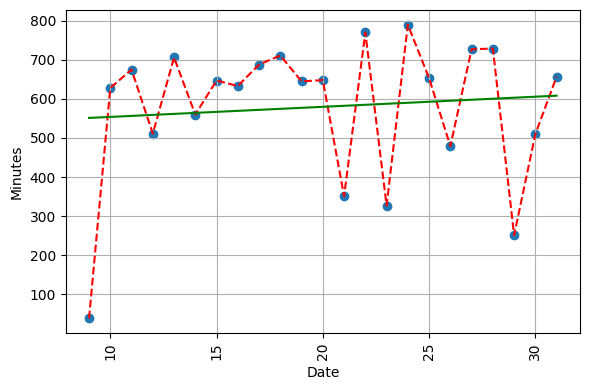

In [253]:
plt.figure(dpi=100)
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Minutes'); plt.xlabel('Date'); plt.xticks(rotation=90)
plt.scatter(x_5, y_5)
plt.plot(x_5, y_5, 'r--')
plt.plot(x_pred[5], y_pred_5, 'g')
plt.tight_layout()

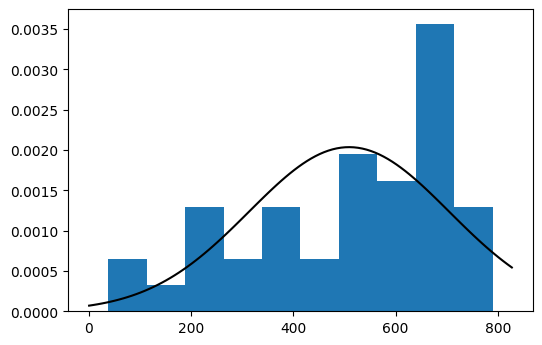

In [254]:
plt.figure(dpi=100)
plt.hist(y_vals, density=True)

# Fitted probability density function
mu, std = norm.fit(y_vals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k')